## *Agam* / *Acol* Species diagnostic from bam files


# Genotype mosquitoes from selenkenyi for the diagnostic SNPs
### 214063 genomewide SNPs

In [5]:
%%bash
## Genotype species diagnostic SNP positions
#import os, subprocess
for file in /mnt/popi/home/travc/seq_v2/AgamP4/samples/*SEL*/*bam
do
echo "samtools mpileup -uf /mnt/popi/archive/reference/Anopheles-gambiae-PEST_CHROMOSOMES_AgamP4.fa -l MS_snps.bed $file | bcftools call -c - > $(basename $file .bam).vcf"
done #> genotype.sh

# parallel --gnu --ungroup --nice 9 -a genotype.sh


samtools mpileup -uf /mnt/popi/archive/reference/Anopheles-gambiae-PEST_CHROMOSOMES_AgamP4.fa -l MS_snps.bed /mnt/popi/home/travc/seq_v2/AgamP4/samples/02SELI0080/02SELI0080.bam | bcftools call -c - > 02SELI0080.vcf
samtools mpileup -uf /mnt/popi/archive/reference/Anopheles-gambiae-PEST_CHROMOSOMES_AgamP4.fa -l MS_snps.bed /mnt/popi/home/travc/seq_v2/AgamP4/samples/02SELI0084/02SELI0084.bam | bcftools call -c - > 02SELI0084.vcf
samtools mpileup -uf /mnt/popi/archive/reference/Anopheles-gambiae-PEST_CHROMOSOMES_AgamP4.fa -l MS_snps.bed /mnt/popi/home/travc/seq_v2/AgamP4/samples/02SELI0085/02SELI0085.bam | bcftools call -c - > 02SELI0085.vcf
samtools mpileup -uf /mnt/popi/archive/reference/Anopheles-gambiae-PEST_CHROMOSOMES_AgamP4.fa -l MS_snps.bed /mnt/popi/home/travc/seq_v2/AgamP4/samples/04SELI0001/04SELI0001.bam | bcftools call -c - > 04SELI0001.vcf
samtools mpileup -uf /mnt/popi/archive/reference/Anopheles-gambiae-PEST_CHROMOSOMES_AgamP4.fa -l MS_snps.bed /mnt/popi/home/travc/seq_v2

# Genotype *An. gambiae* (Savanna) samples from Kela


In [13]:
import pandas as pd
import glob
import os

# choose Savanna An. gambiae KELA samples in the sample key
KELA = pd.read_table("/home/bradmain/gambiae/gene_flow/lcn/sample_key",delim_whitespace=True)
gambiae_samples = KELA.loc[KELA["site"]=="Savanna"]
gambiae_samples_ID = list(gambiae_samples['ID'])
gambiae_samples_ID = [str(i) for i in gambiae_samples_ID]

# Make script to run genotyping with parallel
kela_genotype = open("kela_genotype.sh", 'w')

all_KELA_genomes = glob.glob("/mnt/popi/home/travc/seq_v2/AgamP4/samples/2012KELA*/*bam")
for file in all_KELA_genomes:
    sampleID = file.strip(".bam").split("KELA")[-1]
    if sampleID in gambiae_samples_ID:
        outfile = os.path.basename(file).strip("bam")
        kela_genotype.write("samtools mpileup -uf /mnt/popi/archive/reference/Anopheles-gambiae-PEST_CHROMOSOMES_AgamP4.fa -l fixed_diff_cons_MS.lfile %s | bcftools call -c - > %s" % (file.strip(), outfile + "vcf"))
        kela_genotype.write("\n")
kela_genotype.close()

# parallel --gnu --ungroup --nice 9 -a kela_genotype.sh

# Plot each and determine species

genotype_SEL_bams/2012KELA233.vcf Agam: 0.86
genotype_SEL_bams/2012KELA210.vcf Agam: 0.85
genotype_SEL_bams/2012KELA812.vcf Agam: 0.88
genotype_SEL_bams/2012KELA285.vcf Agam: 0.86
genotype_SEL_bams/2012KELA468.vcf Agam: 0.93
genotype_SEL_bams/2012KELA409.vcf Agam: 0.92
genotype_SEL_bams/2012KELA334.vcf Agam: 0.88
genotype_SEL_bams/2012KELA321.vcf Agam: 0.85
genotype_SEL_bams/2012KELA234.vcf Agam: 0.89
genotype_SEL_bams/2012KELA348.vcf Agam: 0.88
genotype_SEL_bams/2012KELA496.vcf Agam: 0.09
genotype_SEL_bams/2012KELA228.vcf Agam: 0.88


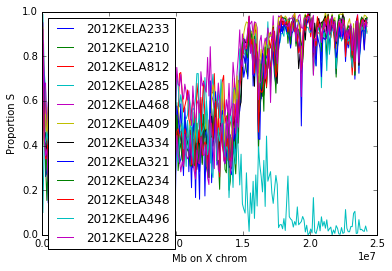

In [1]:
import glob
%matplotlib inline
import propS_plotter #Import my proportion An. gambiae plotting module
import mean_propS #Import my species caller

# Plot and analyze Kela samples
kela_genomes = glob.glob("genotype_SEL_bams/*KELA*vcf")

for file in kela_genomes:
    propS_plotter.propS(file)
    gambiae = mean_propS.species_call(file)
    print(file,"Agam:",gambiae)

# 2012KELA496 is Acol!

# 2012 SEL genomes

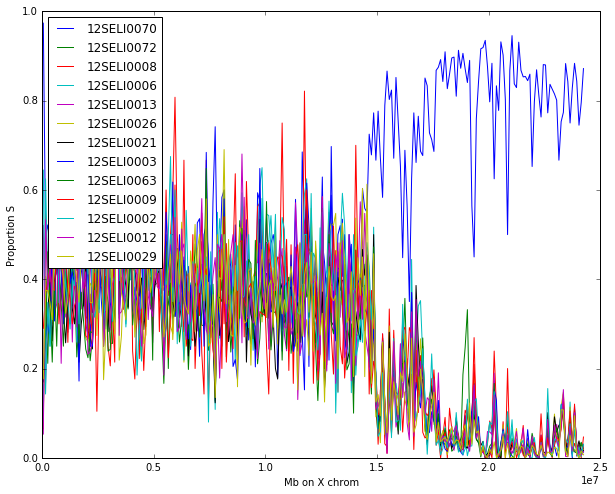

In [2]:
import glob
import propS_plotter #Import my proportion An. gambiae plotting module

SEL_genomes = glob.glob("genotype_SEL_bams/12SEL*vcf")
for file in SEL_genomes:
    propS_plotter.propS(file)

# 2010 SEL genomes
### Only 6 *An. gambiae* from 2010 and 1 from 2012. 

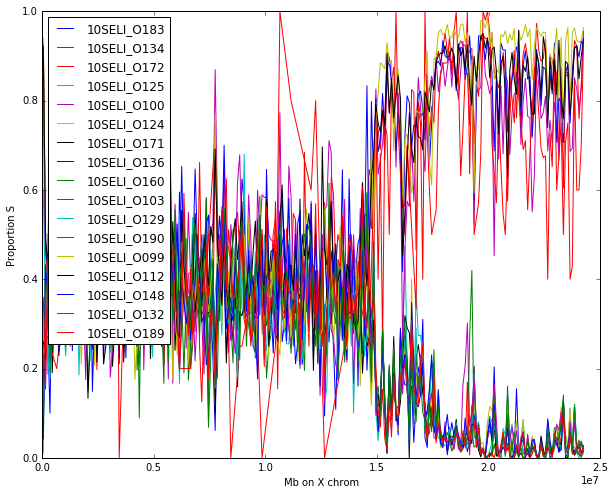

In [3]:
import glob
import propS_plotter #Import my proportion An. gambiae plotting module

SEL_genomes = glob.glob("genotype_SEL_bams/10SEL*vcf")
for file in SEL_genomes:
    propS_plotter.propS(file)

genotype_SEL_bams/10SELI_O129.vcf
genotype_SEL_bams/10SELI_O099.vcf
genotype_SEL_bams/10SELI_O189.vcf


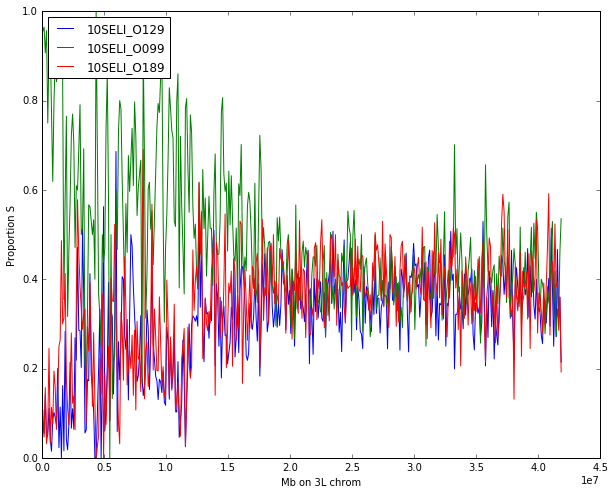

In [7]:
import glob
import propS_plotter_3L #Import my proportion An. gambiae plotting module

SEL_genomes = glob.glob("genotype_SEL_bams/10SELI_O*9.vcf")
for file in SEL_genomes:
    print(file)
    propS_plotter_3L.propS(file)

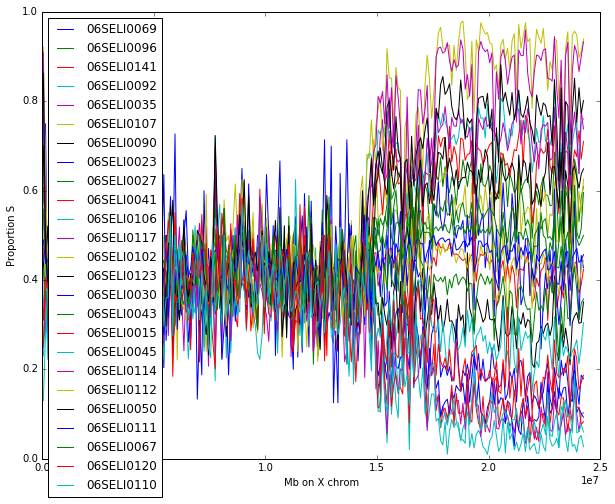

In [4]:
import glob
import propS_plotter #Import my proportion An. gambiae plotting module

SEL_genomes = glob.glob("genotype_SEL_bams/06SEL*vcf")
for file in SEL_genomes:
    propS_plotter.propS(file)
    
#There's a bunch of hybrids in 06, which is making it noisy.

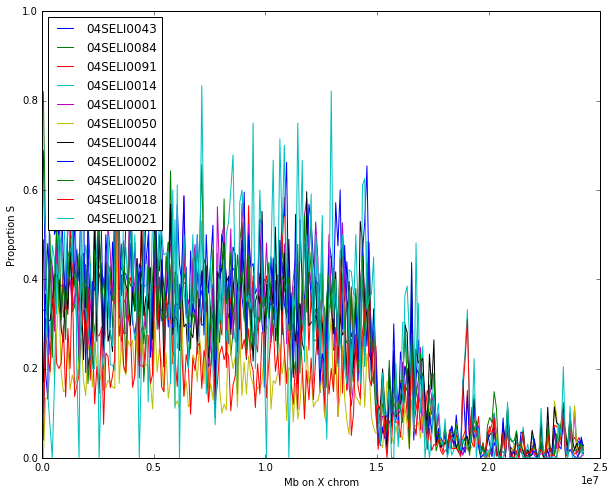

In [5]:
import glob
import propS_plotter #Import my proportion An. gambiae plotting module

SEL_genomes = glob.glob("genotype_SEL_bams/04SEL*vcf")
for file in SEL_genomes:
    propS_plotter.propS(file)
    


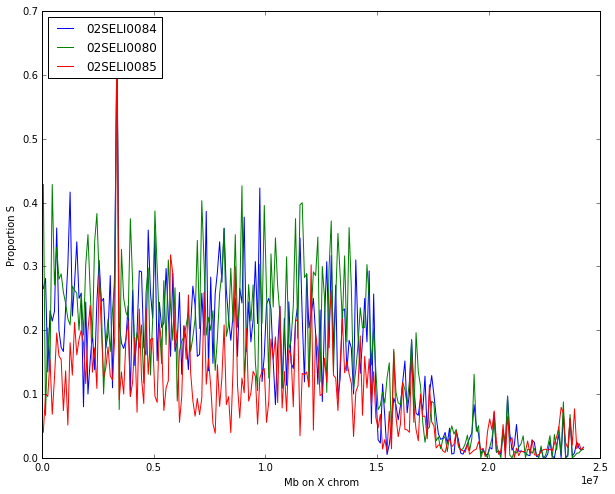

In [6]:
import glob
import propS_plotter #Import my proportion An. gambiae plotting module

SEL_genomes = glob.glob("genotype_SEL_bams/02SEL*vcf")
for file in SEL_genomes:
    propS_plotter.propS(file)
    

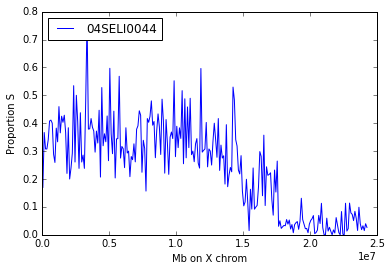

In [8]:
import glob
import propS_plotter #Import my proportion An. gambiae plotting module
%matplotlib inline

SEL_genomes = glob.glob("genotype_SEL_bams/04SEL*44.vcf")
for file in SEL_genomes:
    propS_plotter.propS(file)
    

In [7]:
import glob
import propS_plotter #Import my proportion An. gambiae plotting module
import mean_propS #Import my species caller

SEL_genomes = glob.glob("genotype_SEL_bams/04SELI0044.vcf")
for file in SEL_genomes:
    propS_plotter.propS(file)
    mean_propS.species_call(file)


# Select *An. gambiae* samples from selenkenyi 

In [4]:
import glob
import mean_propS #Import my species caller

SEL_genomes = glob.glob("genotype_SEL_bams/04SEL*vcf")
gambiae = []
for file in SEL_genomes:
    sample_id = file.split("/")[1].strip(".vcf")
    print(sample_id)
    call = mean_propS.species_call(file)
    if call > .7:
        gambiae.append(sample_id)
        print(file,call)

04SELI0043
04SELI0084
04SELI0091
04SELI0014
04SELI0001
04SELI0050
04SELI0044
04SELI0002
04SELI0020
04SELI0018
04SELI0021


In [3]:
%%bash
pwd
ls genotype_SEL_bams/04SEL*vcf

/mnt/data1/home/bradmain/git/tools
genotype_SEL_bams/04SELI0001.vcf
genotype_SEL_bams/04SELI0002.vcf
genotype_SEL_bams/04SELI0014.vcf
genotype_SEL_bams/04SELI0018.vcf
genotype_SEL_bams/04SELI0020.vcf
genotype_SEL_bams/04SELI0021.vcf
genotype_SEL_bams/04SELI0043.vcf
genotype_SEL_bams/04SELI0044.vcf
genotype_SEL_bams/04SELI0050.vcf
genotype_SEL_bams/04SELI0084.vcf
genotype_SEL_bams/04SELI0091.vcf


# Determine coverage

In [10]:
import pandas as pd
#Input coverage information for each genome to help select the best sequenced samples.
cov = pd.read_table("genotype_SEL_bams/mapstats.tsv")
top = cov.loc[cov["#name"].isin(gambiae)]
print(top[['#name', 'X med cov']])



           #name  X med cov
70    06SELI0050       6.41
76    06SELI0102       6.60
77    06SELI0106      13.01
82    06SELI0114       7.58
83    06SELI0117       6.70
98   10SELI_O099      11.83
99   10SELI_O100       0.76
100  10SELI_O103       0.54
101  10SELI_O112       1.32
107  10SELI_O136       1.30
111  10SELI_O172       1.46
137   12SELI0070       1.87


In [5]:
import pandas as pd
#Input coverage information for each genome to help select the best sequenced samples.
cov = pd.read_table("genotype_SEL_bams/mapstats.tsv")
acol = cov.loc[cov["#name"].isin(gambiae)]
print(cov[['#name', 'X med cov']])


              #name  X med cov
0        02SELI0080       3.16
1        02SELI0084       5.11
2        02SELI0085       6.46
3        02YORO0050       4.14
4        02YORO0052       4.29
5        02YORO0053       6.94
6        02YORO0054       5.43
7        02YORO0056       6.67
8        04SELI0001       3.21
9        04SELI0002       1.78
10       04SELI0014      14.37
11       04SELI0018       4.27
12       04SELI0020       5.74
13       04SELI0021       0.62
14       04SELI0043       5.57
15       04SELI0044      22.01
16       04SELI0050      19.89
17       04SELI0084       9.06
18       04SELI0091      23.55
19       05TAKU0002       0.99
20       05TAKU0005       8.74
21       05TAKU0007      12.66
22       05TAKU0022       1.00
23       05TAKU0035       1.22
24       06BANA0008      13.94
25       06BANA0010      10.70
26       06BANA0012       9.48
27       06BANA0013       8.26
28       06BANA0016       7.40
29       06BANA0035       6.39
..              ...        ...
236     

# Many of the gambiae samples are too low coverage